# Tutorial
- Train / test on ML-Cup dataset
    - SGD
    - BFGS
    - L-BFGS

- Perform grid search
    - SGD
    - BFGS
    - L-BFGS
- Save and load network parametes

In [1]:
from Validation import *
from time import time
from utils import *
from grid_search import *
from Neural_network import *

# Monk 1,2,3 with SGD, BFGS and L-BFGS

### Load  Monk dataset

In [ ]:
# choose monk dataset
monk = str(3)
columns = ['label', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'id']

# 1. traning set
train_file = "../monk_datasets/monks-" + monk + ".train"
train_data = pd.read_csv(train_file, delim_whitespace=True, header=None)
train_data.columns = columns

# 2. test set
test_file = "../monk_datasets/monks-" + monk + ".test"
test_data = pd.read_csv(test_file, delim_whitespace=True, header=None)
test_data.columns = columns

# 3. getting patterns and labels
encoding = [3, 3, 2, 3, 4, 2]
features = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6']
X_train, X_test = decode_patterns(encoding, features, train_data, test_data)
Y_train, Y_test = transform_labels(train_data, test_data)

--------------------------------------
# ML-Cup with SGD, BFGS and L-BFGS

### Load ML-Cup dataset

In [2]:
# 1. read file train set
df = pd.read_csv("../MLCup/ML-CUP17-TR_shuffled.csv", comment='#')
features_col = ["input1","input2","input3","input4","input5",
                "input6","input7", "input8","input9","input10"]
targets_col = ["target_x", "target_y"]

# 2. divide pattern and targets
patterns,labels = divide_patterns_labels(df,features_col,targets_col)

# 3. divide in development set and test set
X_train, Y_train, X_test, Y_test = holdout_cup(patterns,labels, fraction_tr=0.8)

## SGD - cup

In [ ]:
architecture = [17, 10, 10, 2] #[17, 100, 50, 2]
neurons = [InputNeuron, TanHNeuron, TanHNeuron, OutputNeuron]
loss_object = EuclideanError()

learning_rate = 0.01
momentum = 0.9
lambda_ = 0#1 * 1e-3
batch_size = len(X_train)
epsilon = 1e-5
epochs = 10#7000

network = Network(architecture, neurons)

In [ ]:
tic = time()
# 5. train
loss_tr_sgd, miss_train, \
loss_ts_sgd, miss_test, norm_gradients_sgd = network.train_SGD(x_train=X_train, 
                                         y_train=Y_train, 
                                         x_test=X_test,
                                         y_test=Y_test,
                                         lossObject=loss_object,
                                         epochs=epochs, 
                                         learning_rate=learning_rate, 
                                         batch_size=batch_size,
                                         momentum=momentum, 
                                        regularization=lambda_, epsilon=epsilon)
toc = time()

In [ ]:
plot_train_test_learning_curve(loss_ts_sgd, loss_tr_sgd, miss_test, miss_train)
print "loss train:", loss_tr_sgd[-1]
print "loss test:", loss_ts_sgd[-1]
print "training time:", (toc-tic)
print "norm gradient last:", norm_gradients_sgd[-1]

## BFGS - cup

In [3]:
architecture = [17, 10, 10, 2]
neurons = [InputNeuron, TanHNeuron, TanHNeuron, OutputNeuron]
loss_object = EuclideanError()

c_1 = 1e-4
c_2 = 0.9
theta = 0.9
lambda_ = 0
epsilon = 1 * 1e-5
epochs = 500

In [4]:
network = Network(architecture, neurons)

tic = time()
loss_tr_bfgs, miss_tr, \
loss_ts_bfgs, miss_ts, alphas_bfgs, \
norm_gradients_bfgs, cond_bfgs = network.train_BFGS(X_train, Y_train, 
                                                       X_test, Y_test,
                                                       theta=theta, c_1=c_1, c_2=c_2, 
                                                       lossObject=loss_object, 
                                                       regularization=lambda_, 
                                                       epochs=epochs, epsilon=epsilon,
                                                       line_search='wolfe', debug=False)
toc = time()

0 out of 500
1 out of 500
2 out of 500
3 out of 500
4 out of 500
5 out of 500
6 out of 500
7 out of 500
8 out of 500
9 out of 500
10 out of 500
11 out of 500
12 out of 500
13 out of 500
14 out of 500
15 out of 500
16 out of 500
17 out of 500
18 out of 500
19 out of 500
20 out of 500
21 out of 500
22 out of 500
23 out of 500
24 out of 500
25 out of 500
26 out of 500


UnboundLocalError: local variable 'phi_alpha_old' referenced before assignment

In [ ]:
plot_train_test_learning_curve(loss_ts_bfgs, loss_tr_bfgs, miss_ts, miss_tr)
print "loss train:", loss_tr_bfgs[-1]
print "loss test:", loss_ts_bfgs[-1]
print "training time:", (toc-tic)
print "norm gradient last:", norm_gradients_bfgs[-1]

## L-BFGS - cup

In [6]:
architecture = [17, 10, 10, 2]
neurons = [InputNeuron, TanHNeuron, TanHNeuron, OutputNeuron]
loss_object = EuclideanError()

c_1 = 1e-4
c_2 = 0.9
theta = 0.5
lambda_ = 0
epsilon = 1e-5
epochs = 500
m = 10

network = Network(architecture, neurons)

In [7]:
tic = time()
loss_tr_lbfgs, miss_tr, \
loss_ts_lbfgs, miss_ts, alphas_lbfgs, \
norm_gradients_lbfgs, cond_lbfgs = network.train_LBFGS(X_train, Y_train,
                                                        X_test, Y_test,
                                                        theta=theta, 
                                                        c_1=c_1, 
                                                        c_2=c_2, 
                                                        lossObject=loss_object,
                                                        regularization=lambda_, 
                                                        epochs=epochs, 
                                                        epsilon=epsilon, m=m, 
                                                        line_search='wolfe', debug=False)
toc = time()

0 out of 500
True
1 out of 500
False
2 out of 500
False
3 out of 500
False
4 out of 500
False
5 out of 500
False
6 out of 500
False
7 out of 500
False
8 out of 500
False
9 out of 500
False
10 out of 500
False
11 out of 500
False
12 out of 500
False
13 out of 500
False
14 out of 500
False
15 out of 500
False
16 out of 500
False
17 out of 500
False
18 out of 500
False
19 out of 500
False
20 out of 500
False
21 out of 500
False
22 out of 500
False
23 out of 500
False
24 out of 500
False
25 out of 500
False
26 out of 500
False
27 out of 500
False
28 out of 500
False
29 out of 500
False
30 out of 500
False
31 out of 500
False
32 out of 500
False
33 out of 500
False
34 out of 500
False
35 out of 500
False
36 out of 500
False
37 out of 500
False
38 out of 500
False
39 out of 500
False
40 out of 500
False
41 out of 500
False
42 out of 500
False
43 out of 500
False
44 out of 500
False
45 out of 500
False
46 out of 500
False
47 out of 500
False
48 out of 500
False
49 out of 500
False
50 out of 5

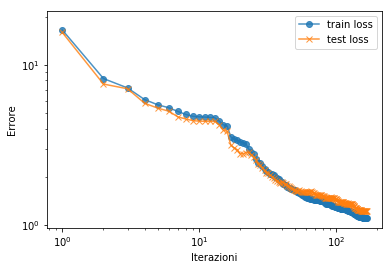

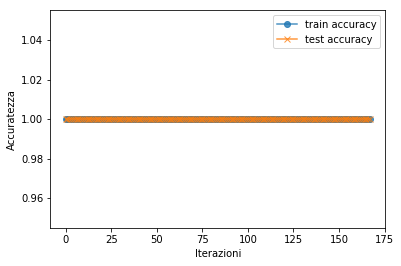

loss train: 1.1098120533
loss test: 1.23549435663
training time: 254.578800917
norm gradient last: 0.413380778067


In [8]:
plot_train_test_learning_curve(loss_ts_lbfgs, loss_tr_lbfgs, miss_ts, miss_tr)
print "loss train:", loss_tr_lbfgs[-1]
print "loss test:", loss_ts_lbfgs[-1]
print "training time:", (toc-tic)
print "norm gradient last:", norm_gradients_lbfgs[-1]

### ML-CUP - optimization plots
- $|| \nabla E(w)||$ vs iterations
- $ |E(w) - E(w^*)| $ vs iterations
- step size $\alpha$ vs iterations (only for BFGS and L-BFGS)

In [ ]:
plot_norm_gradient_vs_iterations(norm_gradients_sgd, norm_gradients_bfgs, norm_gradients_lbfgs)
plot_relative_gap_vs_iterations(list(loss_tr_sgd), list(loss_tr_bfgs), list(loss_tr_lbfgs))
plot_alpha_vs_iterations(alphas_bfgs, alphas_lbfgs)
plot_condition_number_vs_iterations(cond_bfgs, cond_lbfgs=None)

# Grid search

In [ ]:
# directory where to save learning curves
save_directory = './' 
# loss to optimize
loss = SquaredError("tangentH")

In [ ]:
# grid search parameters
grid = GridSearchSGDParams(learning_rate = [0.01, 0.001],
                           momentum = [0.5, 0.9], 
                           batch_size = [16, 32], 
                           architecture = [[17, 10, 1]],
                           neurons = [[InputNeuron, TanHNeuron, TanHNeuron]], 
                           regularization = [0.01, 0.001], 
                           epoch = 5)

# execute grid search
grid_search_SGD(grid, loss, train_patterns, train_labels,
                test_patterns, test_labels, n_trials=1, save_in_dir=save_directory)

In [ ]:
grid = GridSearchBFGSParams(c_1=[0.0001], 
                            c_2=[0.9], 
                            theta=[0.9], 
                            regularization=[0.001], 
                            epsilon=[0.001, 0.0001],
                            epoch=5,
                            architecture = [[17, 10, 1]],
                            neurons = [[InputNeuron, TanHNeuron, TanHNeuron]])         

grid_search_BFGS(grid, loss, train_patterns, train_labels,
                 test_patterns, test_labels, n_trials=2, save_in_dir=save_directory)

In [ ]:
grid = GridSearchLBFGSParams(c_1=[0.0001], 
                            c_2=[0.9], 
                            theta=[0.9], 
                            regularization=[0.001], 
                            epsilon=[0.001, 0.0001],
                            m=[10, 20],
                            epoch=5,
                            architecture = [[17, 10, 1]],
                            neurons = [[InputNeuron, TanHNeuron, TanHNeuron]])

grid_search_LBFGS(grid, loss, train_patterns, train_labels,
                  test_patterns, test_labels,
                  n_trials=5, save_in_dir=save_directory)

## Save & load network parameters

In [ ]:
network = Network([2,5,1], [InputNeuron, TanHNeuron, TanHNeuron])   # random initialized
with open("test_weights.csv", "w") as out_file:
    network.dump_weights(out_file)
    
network_2 = Network([2,5,1], [InputNeuron, TanHNeuron, TanHNeuron]) # random initialized
with open("test_weights.csv", "r") as in_file:
    network_2.load_weights(in_file)
    
network.get_weights_as_vector() == network_2.get_weights_as_vector()

# BFGS vs L-BFGS
varying the parameter $m$ of L-BFGS

In [ ]:
architecture = [17, 5, 5, 1]
neurons = [InputNeuron, TanHNeuron, TanHNeuron, TanHNeuron]
loss_object = SquaredError("tangentH")

c_1 = 1e-4
c_2 = 0.7
theta = 0.7
lambda_ = 0
epsilon = 1e-5
epochs = 200
network_to_copy = Network(architecture, neurons)

In [ ]:
# L-BFGS training
m_values = [1, 3, 5, 7, 9, 11, 13, 15, 17]
time_lbfgs = []
norm_gradient_lbfgs = []
losses_lbfgs = []
iters_lbfgs = []

for m_value in m_values:
    print m_value
    network = copy.deepcopy(network_to_copy)
    tic = time()
    loss_tr, _, _, _, _, norm_gradients, cond = network.train_LBFGS(X_train, Y_train,
                                                        X_test, Y_test,
                                                        theta=theta, 
                                                        c_1=c_1, 
                                                        c_2=c_2, 
                                                        lossObject=loss_object,
                                                        regularization=lambda_, 
                                                        epochs=epochs, 
                                                        epsilon=epsilon, m=m_value)
    toc = time()
    
    # append results
    time_lbfgs.append(toc-tic)
    norm_gradient_lbfgs.append(norm_gradients)
    losses_lbfgs.append(loss_tr)
    iters_lbfgs.append(len(norm_gradients))

In [ ]:
# BFGS train
network = copy.deepcopy(network_to_copy)
tic = time()
loss_tr_bfgs, _, _, _, _, norm_gradients_bfgs, cond = network.train_BFGS(X_train, Y_train,
                                                        X_test, Y_test,
                                                        theta=theta, 
                                                        c_1=c_1, 
                                                        c_2=c_2, 
                                                        lossObject=loss_object,
                                                        regularization=lambda_, 
                                                        epochs=epochs, 
                                                        epsilon=epsilon)
toc = time()

time_bfgs = toc-tic
iters_bfgs = len(norm_gradients_bfgs)

In [ ]:
# time to reach the norm of the gradient less than epsilon
d = {'m': m_values, 'time': np.round(time_lbfgs,2), 'iters': iters_lbfgs, \
     'loss': [l[-1] for l in losses_lbfgs]}
print 'L-BFGS\n', pd.DataFrame(d, index=m_values)
print 'BFGS time:', round(time_bfgs,2), 'iters:', iters_bfgs, 'loss:', loss_tr_bfgs[-1]

In [ ]:
plt.plot(range(iters_bfgs), norm_gradients_bfgs, label='bfgs', color='black', linewidth=2)
for m, gnorm, iters in zip(m_values, norm_gradient_lbfgs, iters_lbfgs):
    plt.plot(range(iters), gnorm, '--', label='l-bfgs, m='+str(m))
    
plt.legend(loc='right', bbox_to_anchor=(1.3, 0.7),
          ncol=1, fancybox=True, shadow=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Iterazioni')
plt.ylabel(r'$||\nabla E(w)||$')
plt.show()

In [ ]:
plt.plot(range(iters_bfgs), loss_tr_bfgs, label='bfgs', color='black', linewidth=2)
for m, loss, iters in zip(m_values, losses_lbfgs, iters_lbfgs):
    plt.plot(range(iters), loss, '--', label='l-bfgs, m='+str(m))
    
plt.legend(loc='right', bbox_to_anchor=(1.3, 0.7),
          ncol=1, fancybox=True, shadow=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Iterazioni')
plt.ylabel(r'$E(w)$')
plt.show()